In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.ticker as ticker

Kullanacağımız kütüphanelerimiz ekliyoruz.

In [2]:
# Veri setini notebook içerisine dahil edelim.

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/medical-and-student/medical_students_dataset.csv")
df = df_.copy()

Burada veri setimi "df" olarak adlandırıyorum ve veri setimi ekliyorum. Bir kopyasını alıyorum çünkü kopya üzerinde işlemleri uygulayacağım.

In [3]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.03,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

Projemin gereksinimi olarak her sütunda 0.03 yüzdelikte kayıp veri oluşturdum.

## VERİ SETİNİ TANIYALIM


Student ID: Öğrenciye ait benzersiz kimlik numarası
Age: Öğrencinin yaşı (yıl olarak)
Gender: Cinsiyeti (ör. "Male", "Female")
Height: Boyu (cm veya metre cinsinden)
Weight: Kilosu (kg cinsinden)
Blood Type: Kan grubu (ör. "A+", "O-")
BMI: Vücut kitle indeksi, kilo ve boy oranı ile hesaplanır
Temperature: Vücut sıcaklığı (°C cinsinden)
Heart Rate: Kalp atış hızı (dakikadaki atım sayısı)
Blood Pressure: Kan basıncı (ör. 120/80 mmHg)
Cholesterol: Kandaki kolesterol seviyesi
Diabetes: Diyabet durumu (var/yok)
Smoking: Sigara içme durumu (ör. "Yes", "No")
rumu (ör. Yes", "No").im

In [4]:
df.head()


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,NaN,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


Verilerimiziz ilk 5 gözlemine bakıyoruz.  

In [5]:
df.shape

(200000, 13)

Toplamda kaç satır ve sütun verimiz olduğunu görüyoruz. 

In [6]:
df.columns

Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')

Burada sütunlarımızın başlıklarını görüyoruz. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      174649 non-null  float64
 1   Age             174561 non-null  float64
 2   Gender          174777 non-null  object 
 3   Height          174603 non-null  float64
 4   Weight          174838 non-null  float64
 5   Blood Type      174711 non-null  object 
 6   BMI             174602 non-null  float64
 7   Temperature     174625 non-null  float64
 8   Heart Rate      174785 non-null  float64
 9   Blood Pressure  174745 non-null  float64
 10  Cholesterol     174504 non-null  float64
 11  Diabetes        174730 non-null  object 
 12  Smoking         174715 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


Her bir sütunda kaç adet eksik olmayan veri olduğunu ve sütunlarımızın türünü burada görüyoruz. 4 kategorik 8 adet numerik değişkenim bulunduğunu burada gözlemiyoruz.

In [8]:
df.dtypes

Student ID        float64
Age               float64
Gender             object
Height            float64
Weight            float64
Blood Type         object
BMI               float64
Temperature       float64
Heart Rate        float64
Blood Pressure    float64
Cholesterol       float64
Diabetes           object
Smoking            object
dtype: object

Değişkenlerin türünü ayrıca görmek istersek bu şekilde getirebiliyoruz.

## SÜTUNLARI SINIFLANDIRMA


Veri setimdehem  kategorikhemdee numeric değişkenler buluuyor bu yüzdena daha sonraki aşamalarda kolaylık sağlaması açısından kategorik ve numeric değişkenleri sınıflandırma işlemi yapacağı.z

In [9]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

veri türü object veya categorical olan sütunları categorical_features'a , olmayanları ise numerical_features'a atadık.

In [10]:
categorical_features , numerical_features

(['Gender', 'Blood Type', 'Diabetes', 'Smoking'],
 ['Student ID',
  'Age',
  'Height',
  'Weight',
  'BMI',
  'Temperature',
  'Heart Rate',
  'Blood Pressure',
  'Cholesterol'])

Burada sınıflandırma işlemimizi yaptık ve "Gender,Blood Type, Diabethes, Smoking" değişkenlerinin kategorik. "Age,Height,Weight,BMI,Temperature,Heart Rate, Blood Pressure,Cholesterol)" değişkenlerinin nümerik olduğunu gösterdik.

## BETİMSEL İSTATİSTİKLERİNE BAKIYORUZ


In [11]:
pd.set_option('display.float_format','{:.2f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Student ID,174649.00,49974.13,28881.05,1.00,24968.00,49938.00,74999.00,100000.00
Age,174561.00,26.02,4.89,18.00,22.00,26.00,30.00,34.00
Height,174603.00,174.96,14.45,150.00,162.49,174.91,187.48,200.00
Weight,174838.00,69.97,17.33,40.00,54.97,69.97,85.00,100.00
BMI,174602.00,23.34,7.03,10.07,17.86,22.67,28.00,44.36
Temperature,174625.00,98.60,0.50,96.40,98.26,98.60,98.94,100.82
Heart Rate,174785.00,79.50,11.54,60.00,70.00,79.00,90.00,99.00
Blood Pressure,174745.00,114.56,14.40,90.00,102.00,115.00,127.00,139.00
Cholesterol,174504.00,184.48,37.56,120.00,152.00,184.00,217.00,249.00


Bu fonksiyon default olarak yalnızca numerik değişkenlere bakar. Burada veri setimizin betimsel istatistiklerine bakıyoruz ortalama,standart sapma,minimum,maksimum ve çeyreklikleri görebiliyoruz. describe kodumun sonuna " .T " komutu da ekleyerek çıktımı yan bir şekilde gösterdim(transpozunu aldım). Gördüğümüz bilgilerden çıkarım yapmak istersek ; Age kategorisinde maksimum yaş 34 ve minimum yaş 18 dir. Bu yaşların ortalaması 26.02 ye denk gelmektedir. Yaşların Standart sapması 4.89 dur şeklinde açıklama yapabiliriz.

## EKSİK VERİLERİ İNCELEYELİM

In [12]:
df.isnull().sum()

Student ID        25351
Age               25439
Gender            25223
Height            25397
Weight            25162
Blood Type        25289
BMI               25398
Temperature       25375
Heart Rate        25215
Blood Pressure    25255
Cholesterol       25496
Diabetes          25270
Smoking           25285
dtype: int64

Her bir sütunumda kaç adet eksik değer olduğunu görüyoruz. Örnek olarak Gender sütunumda 25223 adet eksik gözlemim var.

In [13]:
df.isnull().sum().sum()

329155

Burada toplam kaç adet eksik verimizin olduğunu görüyoruz. 329155 adet.

In [14]:
df.notnull().sum().sum()

2270845

Veri setimizde eksik olmayan toplam veri adedini görüyoruz. 2.270.845

In [15]:
df[df.notnull().all(axis = 1)][:5]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,3.00,32.00,Female,182.54,55.74,A,16.73,98.26,76.00,130.00,216.00,Yes,No
7,8.00,28.00,Male,186.49,52.39,AB,15.06,98.23,85.00,123.00,128.00,No,No
11,12.00,34.00,Female,182.42,76.37,AB,22.95,98.12,86.00,97.00,247.00,No,No
19,20.00,31.00,Male,166.49,49.96,B,18.02,98.81,82.00,96.00,223.00,No,No
29,30.00,34.00,Male,192.50,86.91,AB,23.45,99.47,68.00,124.00,165.00,No,No


İçerisinde hiçbir eksik veri bulunmayan ilk 5 veriyi getirdik.

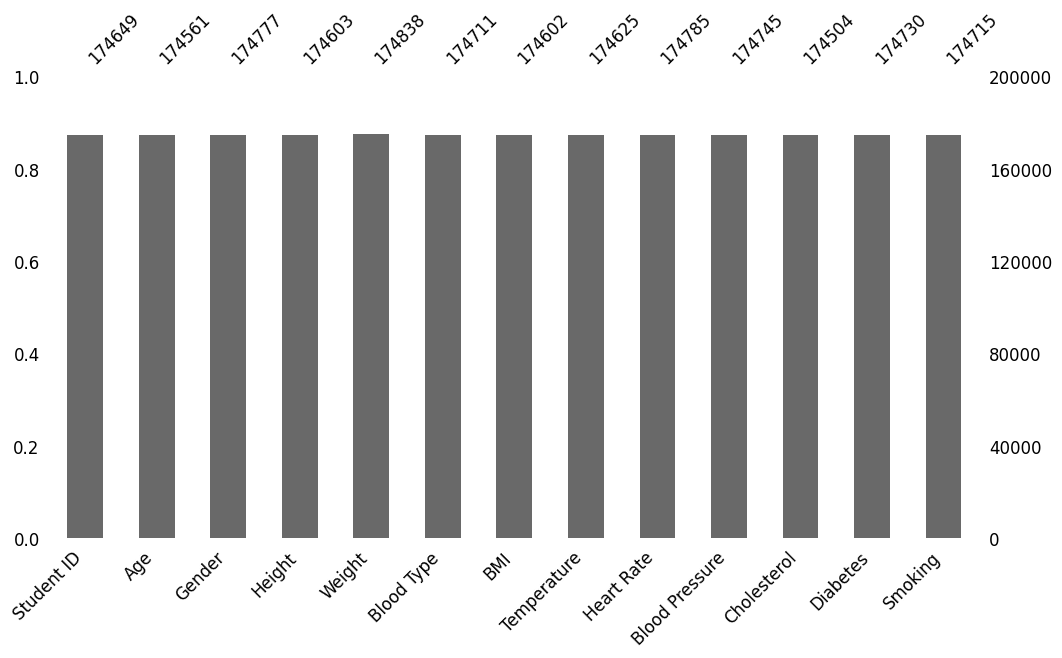

In [16]:
msno.bar(df=df,
        figsize=(12,6),
        fontsize=(12));

Her bir sütundaki veri kaydımı grafik şeklinde gösterdim ancak birbirlerine yakın değerler içerdikleri için net bir görünüm elde edemedik. Burada sütunlarda kaçar adet veri olduğunu yine görebiliyoruz.



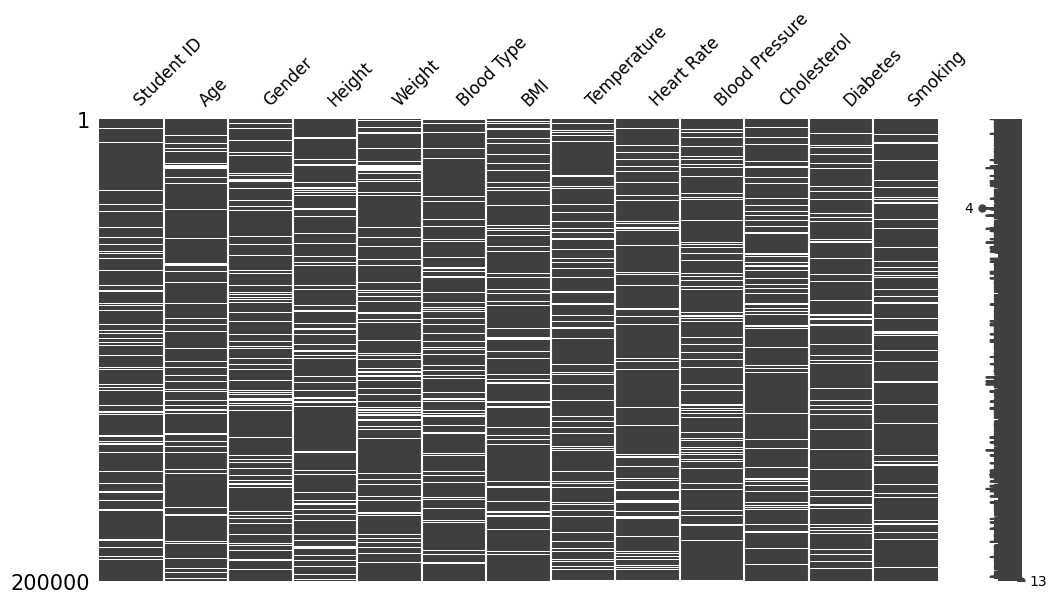

In [17]:
msno.matrix(df=df,
        figsize=(12,6),
        fontsize=(12));

Değişkenlerimin içerisindeki kayıp verilerin birbirleriyle ilişkilerini gözlemlemek için bu kod satırını ve grafiği kullandım. Burada beyaz çizgilerin birbirine denk düşenleri arasında bir ilişki olabilir diyebiliriz. Yine de genel anlamda oldukça homojen bir veri setimiz bulunmakta. 

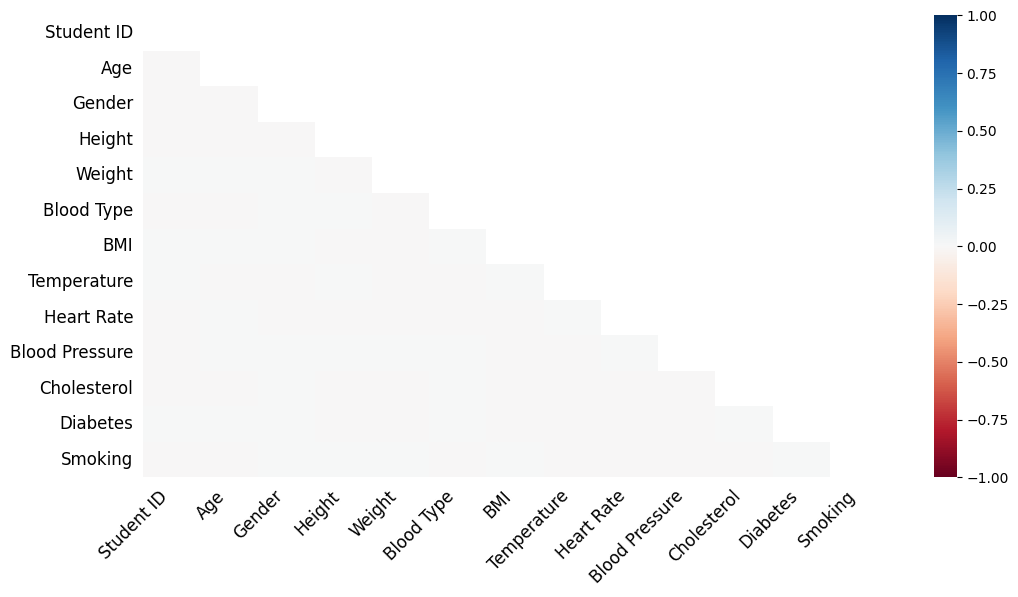

In [18]:
msno.heatmap(df=df,
            figsize=(12,6),
            fontsize=(12));

Burada korelasyon kullanarak eksik verilerimizin arasındaki ilişkiyi görüntüledik ancak bir ilişki olmadığını görebiiliyoruz. Eğer renk maviye yakşasyası aralarında bir korelasyon var diyebilirdik. 



## EKSİK VERİLERLE YAPACAĞIMIZ İŞLEMLER

Eksik verilerimin veri setimin  %kaçını oluşturduğuyla ilgili bilgi edinip sonraki aşamalarda yapacağım işlemlere buna göre karar vereceğim

In [19]:
missing_percantage = (df.isnull().sum()/len(df)) * 100
missing_percantage

Student ID       12.68
Age              12.72
Gender           12.61
Height           12.70
Weight           12.58
Blood Type       12.64
BMI              12.70
Temperature      12.69
Heart Rate       12.61
Blood Pressure   12.63
Cholesterol      12.75
Diabetes         12.63
Smoking          12.64
dtype: float64

Her bir değişkenimin içindeki kayıp veriler o değişkenin % kaçını oluşturduğunu burada görebiliyoruz. Örnek olarak Age sütunundaki kayıp veriler o sütunun %12.72 sini oluşturuyor diyebiliyoruz.



In [20]:
total_missing_percantage= (df.isnull().sum().sum()/(df.size)) * 100
total_missing_percantage

12.659807692307693

Eksik veriler mevcut tüm verimin % 12.66 ' sını oluşturuyor.

Burada eksik verileri doldurmak benim için daha mantıklı bir seçenek fakat ben silme yöntemini kullanarak devam etmek istiyorum.



In [21]:
df_clear = df.dropna(inplace=False)
df_clear

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
2,3.00,32.00,Female,182.54,55.74,A,16.73,98.26,76.00,130.00,216.00,Yes,No
7,8.00,28.00,Male,186.49,52.39,AB,15.06,98.23,85.00,123.00,128.00,No,No
11,12.00,34.00,Female,182.42,76.37,AB,22.95,98.12,86.00,97.00,247.00,No,No
19,20.00,31.00,Male,166.49,49.96,B,18.02,98.81,82.00,96.00,223.00,No,No
29,30.00,34.00,Male,192.50,86.91,AB,23.45,99.47,68.00,124.00,165.00,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199965,99966.00,22.00,Female,166.56,48.68,AB,17.55,98.78,95.00,109.00,152.00,Yes,No
199973,99974.00,25.00,Female,156.30,90.69,B,37.12,98.66,70.00,132.00,164.00,Yes,No
199985,99986.00,23.00,Female,162.88,82.49,B,31.09,98.85,65.00,94.00,188.00,No,Yes
199986,99987.00,34.00,Male,165.65,93.10,A,33.93,97.86,62.00,100.00,205.00,No,No


"dropna" kodunu kullanarak veri setimdeki kayıp verilerimi sildim ve yeni oluşan veri setini "df_clear" eşitliğine atadım. Artık veri setimde işlem yaparken çağıracağım güncel veri setim "df_clear" oldu.

In [22]:
df_clear.isnull().sum()

Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

Burada kayıp veri silme işleminden sonra hiçbir sütunumda kayıp veri kalmadığını görüyoruz.

In [23]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34365 entries, 2 to 199998
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student ID      34365 non-null  float64
 1   Age             34365 non-null  float64
 2   Gender          34365 non-null  object 
 3   Height          34365 non-null  float64
 4   Weight          34365 non-null  float64
 5   Blood Type      34365 non-null  object 
 6   BMI             34365 non-null  float64
 7   Temperature     34365 non-null  float64
 8   Heart Rate      34365 non-null  float64
 9   Blood Pressure  34365 non-null  float64
 10  Cholesterol     34365 non-null  float64
 11  Diabetes        34365 non-null  object 
 12  Smoking         34365 non-null  object 
dtypes: float64(9), object(4)
memory usage: 3.7+ MB


Veri setimde sütunlardaki yeni veri sayılarını görüyoruz her bir sütunda 34365 veri bulunuyor ve artık kayıp verimiz yok. Orjinal indexler silinmedi ancak yeni veri setimizle işlemler yaptığımızda kayıp veri olan satırları sildiği için o satırları işleme almadan atlayarak devam ediyor.

## KATEGORİK DEĞİŞKEN ANALİZLERİM

In [24]:
df_clear_categorical = df_clear.select_dtypes(include="object")
df_clear_categorical

,Gender,Blood Type,Diabetes,Smoking
2,Female,A,Yes,No
7,Male,AB,No,No
11,Female,AB,No,No
19,Male,B,No,No
29,Male,AB,No,No
...,...,...,...,...
199965,Female,AB,Yes,No
199973,Female,B,Yes,No
199985,Female,B,No,Yes
199986,Male,A,No,No


Burada kategorik olan tüm değişkenlerimi "df_clear_categorical" olarak adlandırıp görüntülüyorum



In [25]:
for col in df_clear_categorical.columns:
    print(f'{col} değişkeninde "{df_clear_categorical[col].nunique()}"farklı başlığa sahip değişken vardır \n')

Gender değişkeninde "2"farklı başlığa sahip değişken vardır 

Blood Type değişkeninde "4"farklı başlığa sahip değişken vardır 

Diabetes değişkeninde "2"farklı başlığa sahip değişken vardır 

Smoking değişkeninde "2"farklı başlığa sahip değişken vardır 



bu kod satırında kategorik değişkenlerimin altında kaç adet farklı başlık olduğunu gösteriyoruz.


şimdi yapacağım işlemde ise her bir değişkenimin sahip olduğu benzersiz kategorilerden veri setimde kaçar adet olduğunu görüntüleyeceğim

In [26]:
for col in df_clear_categorical.columns:
    print(f'{df_clear_categorical[col].value_counts()}\n' , 5*"********************")

Gender
Female    17336
Male      17029
Name: count, dtype: int64
 ****************************************************************************************************
Blood Type
B     8732
O     8602
A     8592
AB    8439
Name: count, dtype: int64
 ****************************************************************************************************
Diabetes
No     31003
Yes     3362
Name: count, dtype: int64
 ****************************************************************************************************
Smoking
No     27535
Yes     6830
Name: count, dtype: int64
 ****************************************************************************************************


Burada veri setimde ki kategorileri ve bu kategorilerin kaçar adet veri bulundurduğunu görüyoruz. 

## KATEGORİK DEĞİŞKENLERDE GÖRSELLEŞTİRMELER


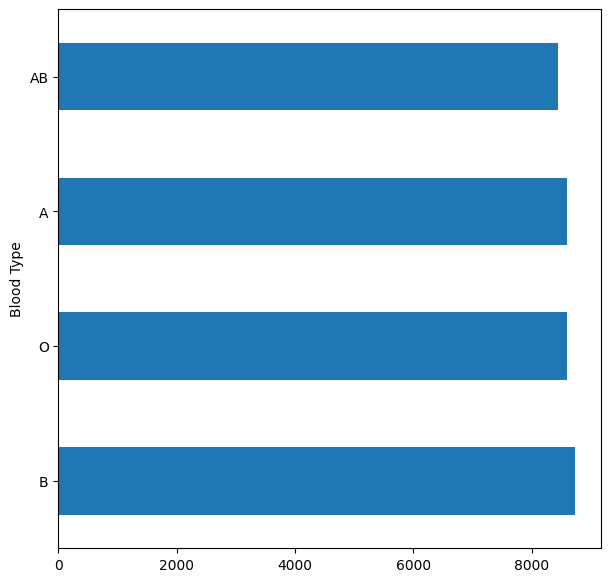

In [27]:
df_clear['Blood Type'].value_counts().plot.barh(figsize=(7,7));


Blood Type değişkenimde 4 farklı kan tipi olduğu için grafiğim bu şekilde karmaşık çıkıyor ancak yine de kan tipi dağılımlarının birbirinde çok da farklı olmadığını göstermek amacıyla bu grafik yeterli.

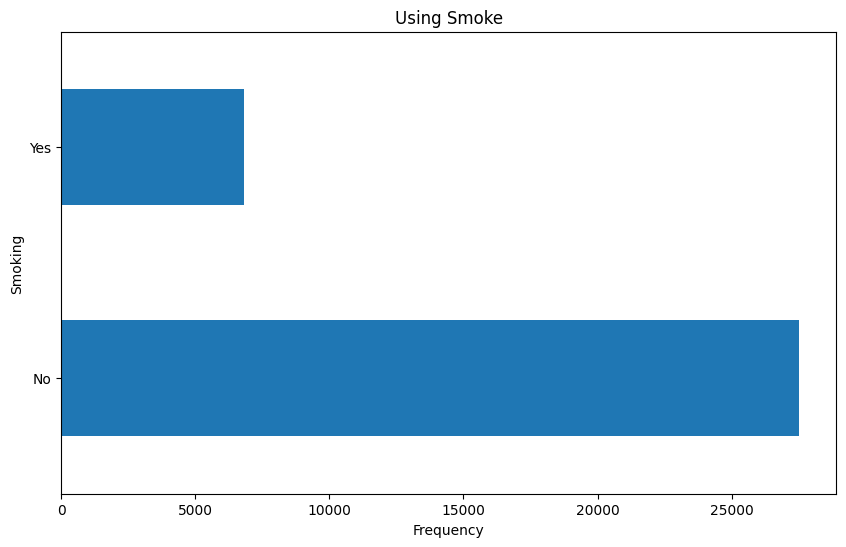

In [28]:
smoke = df_clear['Smoking'].value_counts().nlargest(10)

smoke.plot.barh(figsize=(10, 6))

plt.title('Using Smoke')
plt.xlabel('Frequency')
plt.ylabel('Smoking')
plt.show()

Burada ki grafikte sigara kullanan ve kullanmayan kişilerin grafiğini görüyoruz.

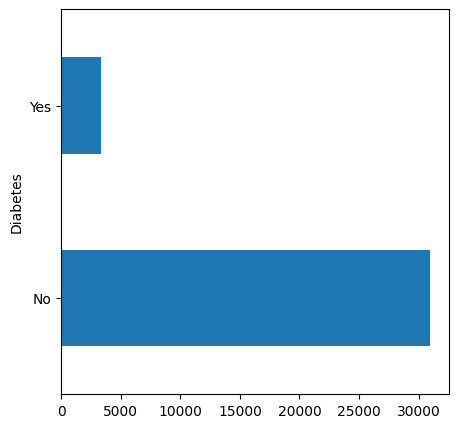

In [29]:
df_clear['Diabetes'].value_counts().plot.barh(figsize=(5,5));


Diabet'e sahip olanlar ve olmayanları yine bu grafikte görebiliyoruz.

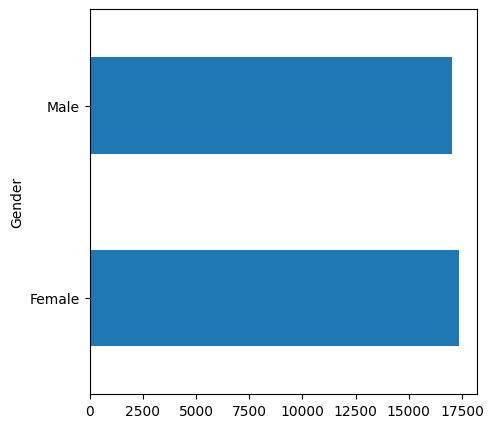

In [30]:
df_clear['Gender'].value_counts().plot.barh(figsize=(5,5));

In [31]:
#Bu grafikte ise cinsiyet dağılımını görmekteyiz.

## KATEGORİK GRUPLAMA TERCİHLERİ


kendime bir araştırma sorusu oluşturuyorum örneğin Kalp atışının vücut sıcaklığına etkisi var mı? 

In [32]:
df_clear_Blood_Pre = df.groupby(by = "Heart Rate")["Temperature"].mean().to_frame().reset_index().sort_values(by = "Temperature", ascending = False)

df_clear_Blood_Pre

,Heart Rate,Temperature
10,70.00,98.62
8,68.00,98.62
3,63.00,98.62
19,79.00,98.62
2,62.00,98.61
36,96.00,98.61
24,84.00,98.61
16,76.00,98.61
23,83.00,98.61
20,80.00,98.61


Kalp atışınını vücut sıcaklığına herhangi bir etkisi olmadığı görülmektedir.

In [33]:
df_clear_country = df_clear.groupby(by = "Blood Type")["Gender"].value_counts().to_frame().reset_index().sort_values(by = "count", ascending = False)
df_clear_turkey = df_clear_country[df_clear_country['Blood Type']=="A"]
df_clear_turkey

,Blood Type,Gender,count
0,A,Male,4297
1,A,Female,4295


Burada A kan gurubuna sahip kadın ve erkeklerin sayılarını öğreniyoruz.

## NUMERİC DEĞİŞKEN ANALİZLERİM

In [34]:
df_clear_numerical = df_clear.select_dtypes(include = ["float64","int64"])
df_clear_numerical.head()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
2,3.00,32.00,182.54,55.74,16.73,98.26,76.00,130.00,216.00
7,8.00,28.00,186.49,52.39,15.06,98.23,85.00,123.00,128.00
11,12.00,34.00,182.42,76.37,22.95,98.12,86.00,97.00,247.00
19,20.00,31.00,166.49,49.96,18.02,98.81,82.00,96.00,223.00
29,30.00,34.00,192.50,86.91,23.45,99.47,68.00,124.00,165.00


Burada parametresi float veya int olan değişkenleri seçiyoruz bunları da nümerik değişkenlerimiz olarak kodluyoruz.



In [35]:
pd.set_option('display.float_format','{:.2f}'.format)
df_clear_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Student ID,34365.00,50095.09,28800.67,3.00,25038.00,50257.00,75011.00,99999.00
Age,34365.00,26.03,4.89,18.00,22.00,26.00,30.00,34.00
Height,34365.00,174.88,14.42,150.00,162.50,174.77,187.43,200.00
Weight,34365.00,70.07,17.31,40.00,55.04,70.25,85.09,100.00
BMI,34365.00,23.39,7.05,10.07,17.87,22.77,28.08,44.29
Temperature,34365.00,98.60,0.50,96.40,98.26,98.60,98.94,100.75
Heart Rate,34365.00,79.48,11.56,60.00,70.00,79.00,90.00,99.00
Blood Pressure,34365.00,114.57,14.37,90.00,102.00,115.00,127.00,139.00
Cholesterol,34365.00,184.33,37.64,120.00,152.00,184.00,217.00,249.00


Burada verilerimizin tanımlayıcı istatistiklerini görüyoruz. Örnek olarak BMI(Vücut kitle indeksi) değerinin ortalması 23.39 ve std sapması 7.05 dir.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


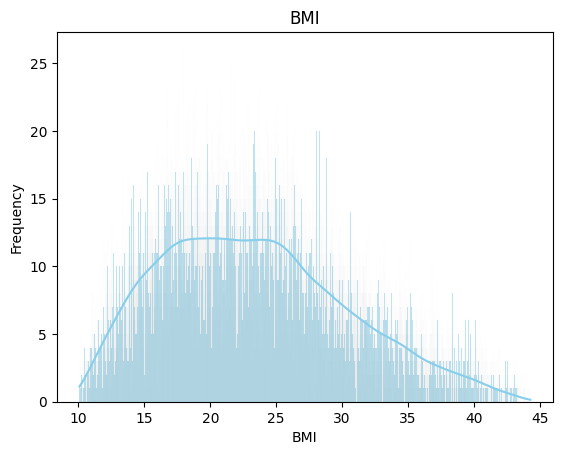

<Figure size 1200x600 with 0 Axes>

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Verinin histogramını çiz
sns.histplot(data=df_clear['BMI'], bins=5000, kde=True, color='skyblue')

# X eksenindeki sayıları tam formatta göstermek için
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Başlık ve etiketler
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Grafik boyutunu ayarlamak
plt.figure(figsize=(12, 6))

# Grafiği göster
plt.show()

Burada BMI'nın dağılımını görüyoruz. Sağa çarpık olduğunu söylebiliriz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

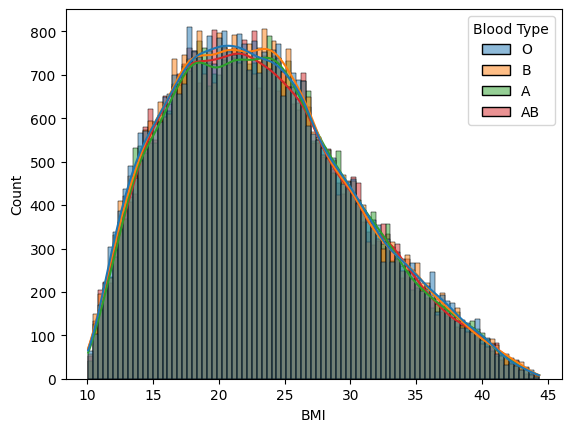

In [37]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
sns.histplot(data = df, x = "BMI", kde = True, hue = "Blood Type");

Burada BMI nın Blood type ile birlikte histogramına bakıyoruz. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


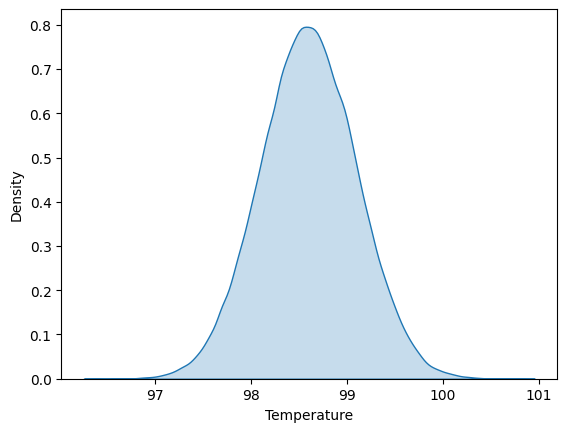

In [38]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['Temperature'], fill = True);

Bu grafikte vücut sıcaklığının yoğunluğuna bakıyoruz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


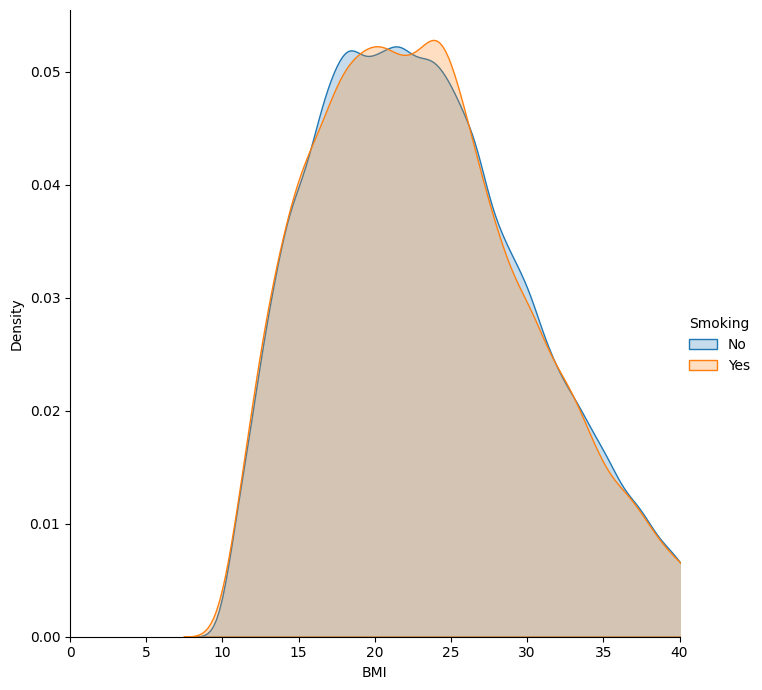

In [39]:
# FacetGrid kullanarak kategorik kırılımda yoğunluk gözlemleyebiliriz.
sns.FacetGrid(data = df,
              hue = "Smoking",
              height = 7,
              xlim = (0, 40)).map(sns.kdeplot, "BMI", fill = True).add_legend();

Kategorik kırılımı görüyoruz. Sigara içmeinin BMI ile ilişkisinin kategorik kırılımı.

<Figure size 1200x800 with 0 Axes>

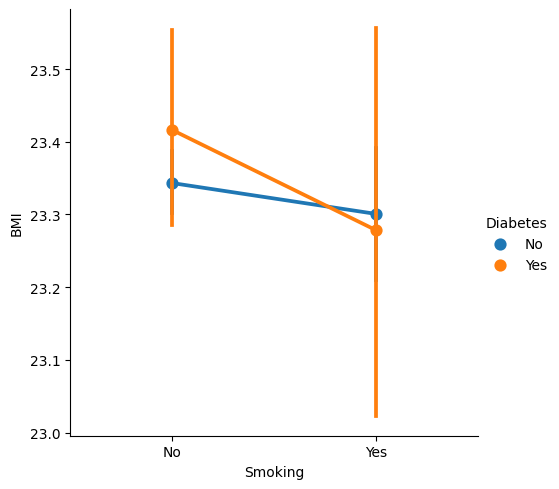

In [40]:
# Catplot ile numerik bir değişkenin kategorik bazda ve kırılımdaki dağılımını görebiliriz.
plt.figure(figsize = (12, 8))
sns.catplot(data = df, x = "Smoking", y = "BMI", hue = "Diabetes", kind = "point");

Burada numerik bir değişkenin kategorik bazda ve kırılımdaki dağılımını görebiliriz.Numerik değişkenim BMI ve kategorik değişkenlerim smoking ile Diabetes. 

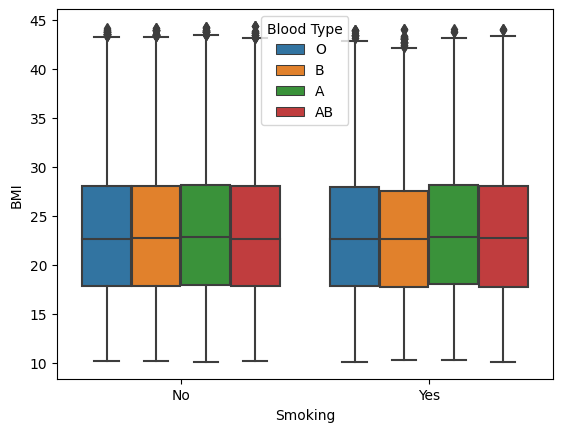

In [41]:
# Boxplot kategorik olarak numerik dağılımı gösterir, çeyreklik değerler ve IQR'a göre aykırı değerler de boxplot ile gözlemlenebilir.
sns.boxplot(data = df,
            x = "Smoking",
            y = "BMI",
            hue = "Blood Type");

Box plot grafiğinde genel olarak normal dağıldığını fakat aykırı değerlerimiz olduğu söyelebiliriz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

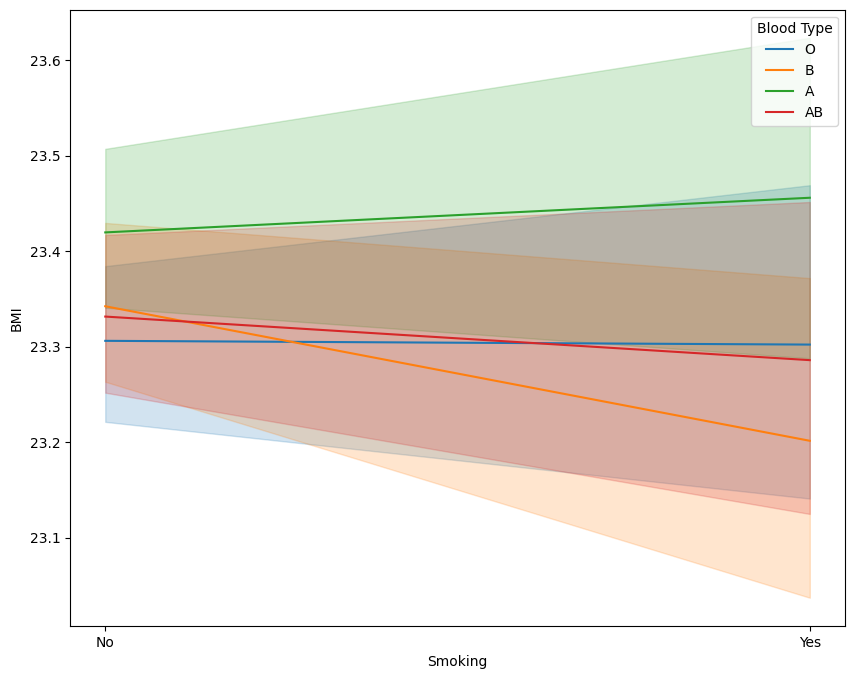

In [42]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = df,
             x = "Smoking",
             y = "BMI",
             hue = "Blood Type");

Çizgi grafiğini görüyoruz. Kan grubu ve sigara içenlerin BMI ya göre çizgi grafiği.

## AYKIRI DEĞER ANALİZİ(OUTLIERS 

In [43]:
df = df_.copy()


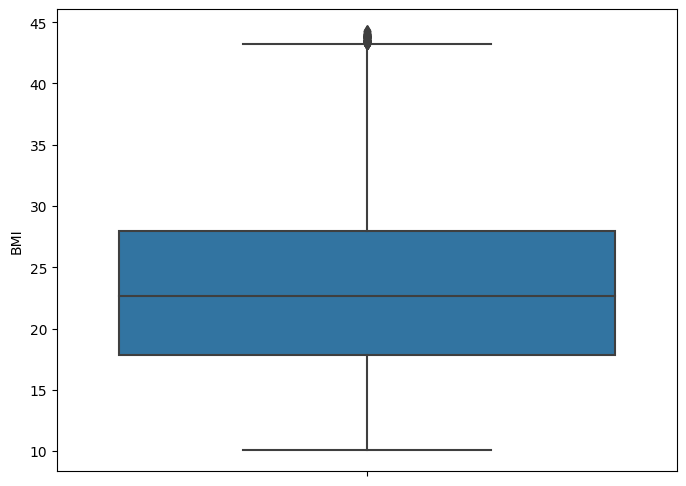

In [44]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["BMI"],
            orient = "v");

In [45]:
df_BMI = df['BMI']
df_BMI

0        27.65
1          NaN
2        16.73
3        19.10
4          NaN
          ... 
199995   30.74
199996   16.83
199997   33.19
199998   20.49
199999   42.18
Name: BMI, Length: 200000, dtype: float64

In [46]:
# Quantile değerlerin belirlenmesi.
Q1 = df_BMI.quantile(0.25)
Q3 = df_BMI.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

17.85839552425438
27.997487364353265
10.139091840098885


In [47]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = df_BMI[df_BMI > upper_fence].index

outlier_idx

Index([   104,    677,   1047,   1234,   3759,   4813,   5745,   8737,   8749,
         9454,
       ...
       191497, 191590, 191799, 192206, 192398, 194122, 195682, 197825, 198933,
       199277],
      dtype='int64', length=186)

In [48]:
df_BMI[df_BMI > upper_fence]

104      44.01
677      43.24
1047     43.47
1234     43.96
3759     43.64
          ... 
194122   44.07
195682   43.76
197825   43.54
198933   43.69
199277   43.30
Name: BMI, Length: 186, dtype: float64

## AYKIRI GÖZLEMLERİN SİLİNMESİ


In [49]:
df_del = df[~(df_BMI > upper_fence)]

df_del

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.00,18.00,Female,161.78,72.35,O,27.65,NaN,95.00,109.00,203.00,No,NaN
1,2.00,NaN,Male,152.07,47.63,B,NaN,98.71,93.00,104.00,163.00,No,No
2,3.00,32.00,Female,182.54,55.74,A,16.73,98.26,76.00,130.00,216.00,Yes,No
3,NaN,30.00,Male,182.11,63.33,B,19.10,98.84,99.00,112.00,141.00,No,Yes
4,5.00,23.00,Female,NaN,46.23,O,NaN,98.48,95.00,NaN,231.00,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.00,Male,176.50,95.76,B,30.74,99.17,65.00,121.00,130.00,No,No
199996,99997.00,29.00,Female,163.92,45.23,NaN,16.83,97.87,62.00,125.00,198.00,No,Yes
199997,99998.00,34.00,Female,NaN,99.65,NaN,33.19,98.77,60.00,90.00,154.00,NaN,No
199998,99999.00,30.00,Female,156.45,50.14,A,20.49,98.99,61.00,106.00,225.00,No,No


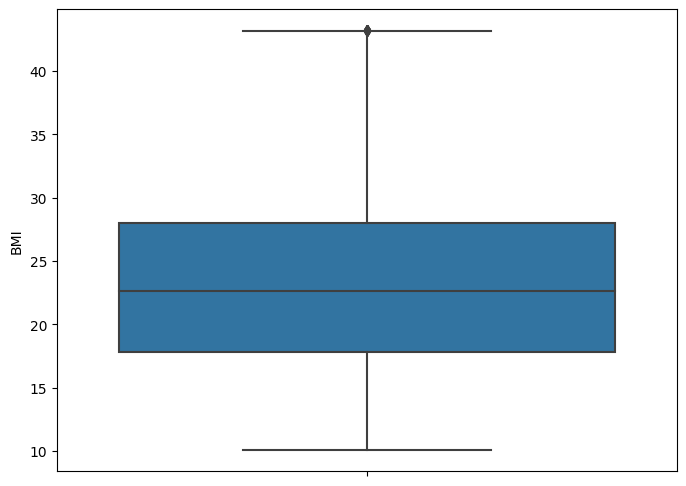

In [50]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["BMI"],
            orient = "v");

## BASKILAMA YÖNTEMİ


In [51]:
df = df_.copy()

In [52]:
df.loc[df_BMI > upper_fence, "BMI"] = upper_fence

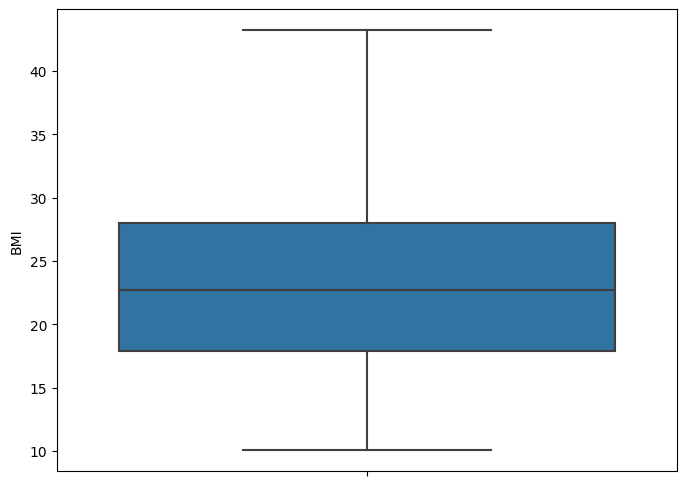

In [53]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["BMI"],
            orient = "v");

## FEATURE ENGINEERING

In [54]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.00,18.00,Female,161.78,72.35,O,27.65,NaN,95.00,109.00,203.00,No,NaN
1,2.00,NaN,Male,152.07,47.63,B,NaN,98.71,93.00,104.00,163.00,No,No
2,3.00,32.00,Female,182.54,55.74,A,16.73,98.26,76.00,130.00,216.00,Yes,No
3,NaN,30.00,Male,182.11,63.33,B,19.10,98.84,99.00,112.00,141.00,No,Yes
4,5.00,23.00,Female,NaN,46.23,O,NaN,98.48,95.00,NaN,231.00,No,No


In [55]:

def BMIRANGE(BMI):
    if BMI < 80000:
        return 'Low'
    elif 80000 <= BMI <= 150000:
        return 'Medium'
    else:
        return 'High'

df['BMIRANGE'] = df['BMI'].apply(BMIRANGE)

df.head(3)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking,BMIRANGE
0,1.00,18.00,Female,161.78,72.35,O,27.65,NaN,95.00,109.00,203.00,No,NaN,Low
1,2.00,NaN,Male,152.07,47.63,B,NaN,98.71,93.00,104.00,163.00,No,No,High
2,3.00,32.00,Female,182.54,55.74,A,16.73,98.26,76.00,130.00,216.00,Yes,No,Low


BMI (Vücut Kitle İndeksi) değerlerini belirli aralıklara ayırarak her bir değere bir kategori atadık.

In [56]:
# Sigara içen ve diyabetli olan kişileri tespit et
df['is_smoking_and_diabetic'] = df.apply(
    lambda row: True if row['Smoking'] == 'Yes' and row['Diabetes'] == 'Yes' else False, axis=1
)

# Bu gruba giren kişileri filtrele
smoking_and_diabetic = df[df['is_smoking_and_diabetic'] == True]

# Sonuçları incele
print(smoking_and_diabetic)

        Student ID   Age  Gender  Height  Weight Blood Type   BMI  \
14           15.00 33.00    Male  184.72   93.67        NaN 27.45   
33             NaN 33.00    Male  177.17   68.13          O 21.71   
34           35.00 33.00    Male  160.46   55.76          A 21.65   
54           55.00 34.00    Male  174.21     NaN          B 22.29   
82           83.00 24.00  Female  162.04   80.64         AB 30.71   
...            ...   ...     ...     ...     ...        ...   ...   
199643    99644.00 26.00    Male  163.09   78.91          O   NaN   
199800    99801.00 32.00    Male  172.58   79.39          A 26.66   
199863    99864.00 19.00    Male     NaN   78.86          O 21.31   
199881    99882.00 31.00  Female  174.72     NaN          B   NaN   
199919    99920.00 21.00    Male  161.18   55.81          A 21.48   

        Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  \
14            98.42       68.00          133.00       180.00      Yes     Yes   
33       